# ESCUELA POLITÉCNICA NACIONAL
# MÉTODOS NUMÉRICOS

## [Tarea 12] Ejercicios Unidad 05-A | ODE Método de Euler

### JHONN ALEXANDER SAETEROS LAIME

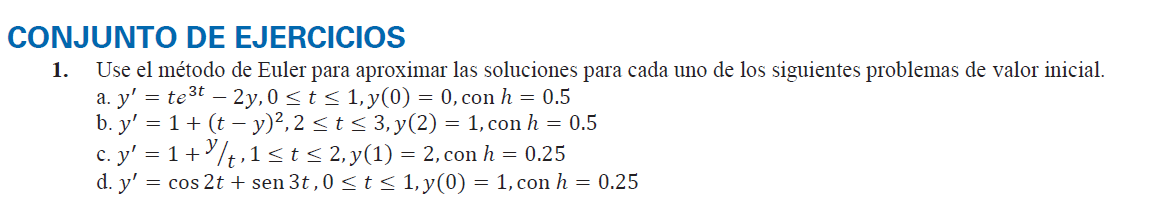

Problema 1a - Método de Euler (h=0.5)
t          Aproximado      Exacto          Error          
0.00       0.000000        0.000000        0.000000       
0.50       0.000000        0.283617        0.283617       
1.00       1.120422        3.219099        2.098677       


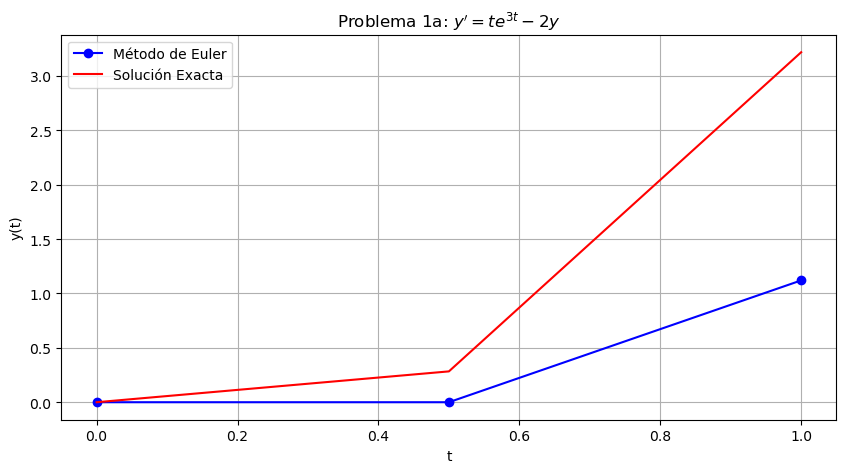

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de la EDO y solución exacta
def f1a(t, y):
    return t * np.exp(3*t) - 2*y

def exact_sol1a(t):
    return (1/5)*t*np.exp(3*t) - (1/25)*np.exp(3*t) + (1/25)*np.exp(-2*t)

# Método de Euler
def euler_method(f, t0, y0, h, n):
    t = np.zeros(n+1)
    y = np.zeros(n+1)
    t[0] = t0
    y[0] = y0
    for i in range(n):
        y[i+1] = y[i] + h * f(t[i], y[i])
        t[i+1] = t[i] + h
    return t, y

# Parámetros
t0, y0 = 0, 0
h = 0.5
n = int((1 - t0)/h)  # Número de pasos

# Aplicar Euler
t_euler, y_euler = euler_method(f1a, t0, y0, h, n)

# Solución exacta en los mismos puntos
y_exact = exact_sol1a(t_euler)

# Calcular errores
errors = np.abs(y_exact - y_euler)

# Resultados en tabla
print("Problema 1a - Método de Euler (h=0.5)")
print("{:<10} {:<15} {:<15} {:<15}".format("t", "Aproximado", "Exacto", "Error"))
for ti, ye, ya in zip(t_euler, y_euler, y_exact):
    print("{:<10.2f} {:<15.6f} {:<15.6f} {:<15.6f}".format(ti, ye, ya, abs(ya - ye)))

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(t_euler, y_euler, 'bo-', label='Método de Euler')
plt.plot(t_euler, y_exact, 'r-', label='Solución Exacta')
plt.title("Problema 1a: $y' = te^{3t} - 2y$")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

Problema 1b - Método de Euler (h=0.5)
t          Aproximado      Exacto          Error          
2.00       1.000000        1.000000        0.000000       
2.50       2.000000        1.833333        0.166667       
3.00       2.625000        2.500000        0.125000       


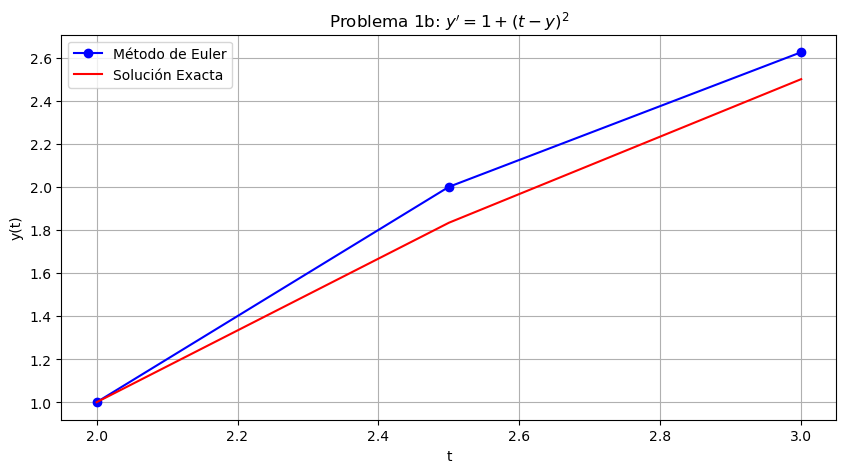

In [57]:
def f1b(t, y):
    return 1 + (t - y)**2

def exact_sol1b(t):
    return t + 1/(1 - t)

# Parámetros
t0, y0 = 2, 1
h = 0.5
n = int((3 - t0)/h)

# Aplicar Euler
t_euler, y_euler = euler_method(f1b, t0, y0, h, n)

# Solución exacta
y_exact = exact_sol1b(t_euler)

# Resultados
print("Problema 1b - Método de Euler (h=0.5)")
print("{:<10} {:<15} {:<15} {:<15}".format("t", "Aproximado", "Exacto", "Error"))
for ti, ye, ya in zip(t_euler, y_euler, y_exact):
    print("{:<10.2f} {:<15.6f} {:<15.6f} {:<15.6f}".format(ti, ye, ya, abs(ya - ye)))

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(t_euler, y_euler, 'bo-', label='Método de Euler')
plt.plot(t_euler, y_exact, 'r-', label='Solución Exacta')
plt.title("Problema 1b: $y' = 1 + (t - y)^2$")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

Problema 1c - Método de Euler (h=0.25)
t          Aproximado      Exacto          Error          
1.00       2.000000        2.000000        0.000000       
1.25       2.750000        2.778929        0.028929       
1.50       3.550000        3.608198        0.058198       
1.75       4.391667        4.479328        0.087661       
2.00       5.269048        5.386294        0.117247       


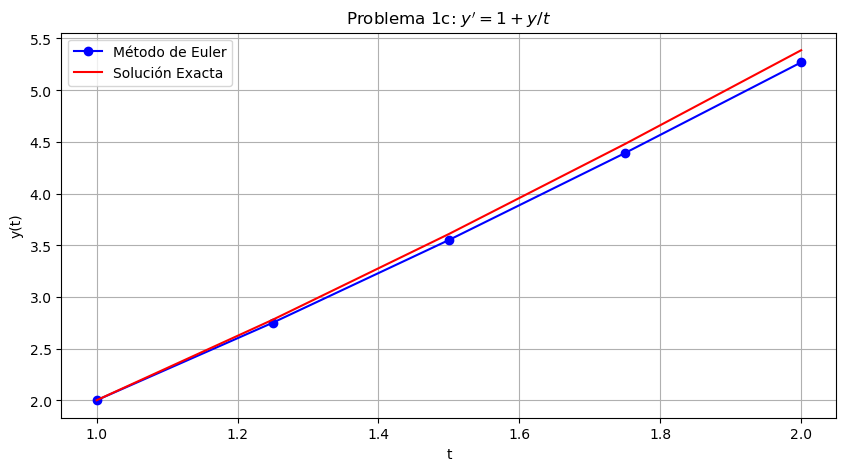

In [58]:
def f1c(t, y):
    return 1 + y/t

def exact_sol1c(t):
    return t * np.log(t) + 2*t

# Parámetros
t0, y0 = 1, 2
h = 0.25
n = int((2 - t0)/h)

# Aplicar Euler
t_euler, y_euler = euler_method(f1c, t0, y0, h, n)

# Solución exacta
y_exact = exact_sol1c(t_euler)

# Resultados
print("Problema 1c - Método de Euler (h=0.25)")
print("{:<10} {:<15} {:<15} {:<15}".format("t", "Aproximado", "Exacto", "Error"))
for ti, ye, ya in zip(t_euler, y_euler, y_exact):
    print("{:<10.2f} {:<15.6f} {:<15.6f} {:<15.6f}".format(ti, ye, ya, abs(ya - ye)))

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(t_euler, y_euler, 'bo-', label='Método de Euler')
plt.plot(t_euler, y_exact, 'r-', label='Solución Exacta')
plt.title("Problema 1c: $y' = 1 + y/t$")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

<>:28: SyntaxWarning: invalid escape sequence '\c'
<>:28: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Jhonn22\AppData\Local\Temp\ipykernel_10104\4038655701.py:28: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Problema 1d: $y' = \cos 2t + \sin 3t$")


Problema 1d - Método de Euler (h=0.25)
t          Aproximado      Exacto          Error          
0.00       1.000000        1.000000        0.000000       
0.25       1.250000        1.329150        0.079150       
0.50       1.639805        1.730490        0.090684       
0.75       2.024255        2.041472        0.017217       
1.00       2.236457        2.117980        0.118478       


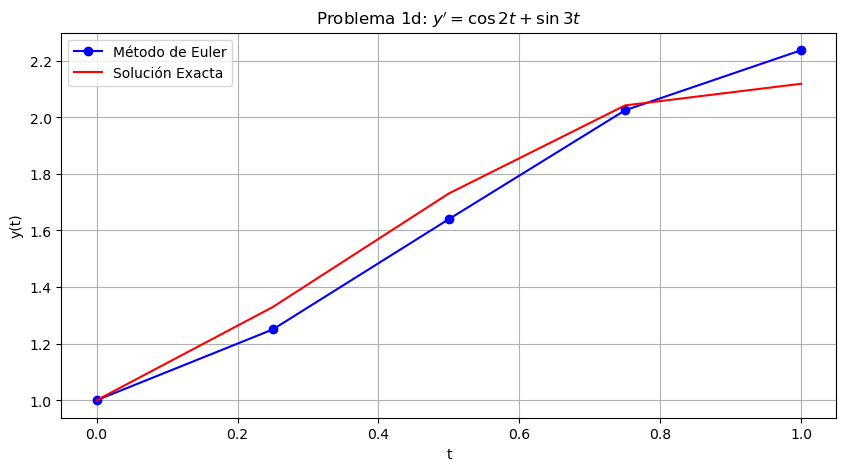

In [59]:
def f1d(t, y):
    return np.cos(2*t) + np.sin(3*t)

def exact_sol1d(t):
    return (1/2)*np.sin(2*t) - (1/3)*np.cos(3*t) + 4/3

# Parámetros
t0, y0 = 0, 1
h = 0.25
n = int((1 - t0)/h)

# Aplicar Euler
t_euler, y_euler = euler_method(f1d, t0, y0, h, n)

# Solución exacta
y_exact = exact_sol1d(t_euler)

# Resultados
print("Problema 1d - Método de Euler (h=0.25)")
print("{:<10} {:<15} {:<15} {:<15}".format("t", "Aproximado", "Exacto", "Error"))
for ti, ye, ya in zip(t_euler, y_euler, y_exact):
    print("{:<10.2f} {:<15.6f} {:<15.6f} {:<15.6f}".format(ti, ye, ya, abs(ya - ye)))

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(t_euler, y_euler, 'bo-', label='Método de Euler')
plt.plot(t_euler, y_exact, 'r-', label='Solución Exacta')
plt.title("Problema 1d: $y' = \cos 2t + \sin 3t$")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

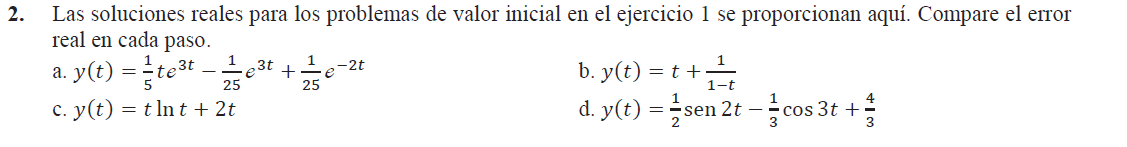

Problema 1a:
t          Aproximado      Exacto          Error          
0.000      0.000000        0.000000        0.000000       
0.500      0.000000        0.283617        0.283617       
1.000      1.120422        3.219099        2.098677       

Error máximo: 2.098677


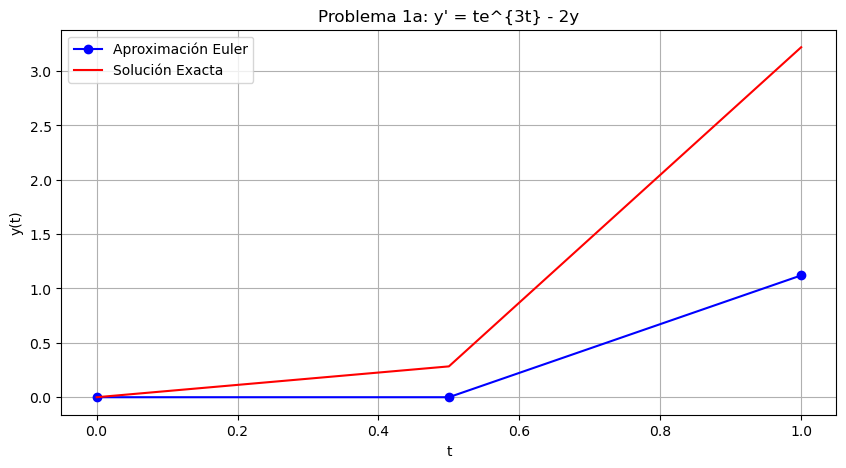

In [60]:
# 1.a)
# Parámetros
t0, y0 = 0, 0
h = 0.5
n = int(1/h)

# Solución
t, y = euler_method(f1a, t0, y0, h, n)
errors, y_exact = calculate_errors(t, y, sol1a)

# Resultados
print("Problema 1a:")
print_results(t, y, y_exact, errors)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(t, y, 'bo-', label='Aproximación Euler')
plt.plot(t, y_exact, 'r-', label='Solución Exacta')
plt.title("Problema 1a: y' = te^{3t} - 2y")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()


Problema 1b:
t          Aproximado      Exacto          Error          
2.000      1.000000        1.000000        0.000000       
2.500      2.000000        1.833333        0.166667       
3.000      2.625000        2.500000        0.125000       

Error máximo: 0.166667


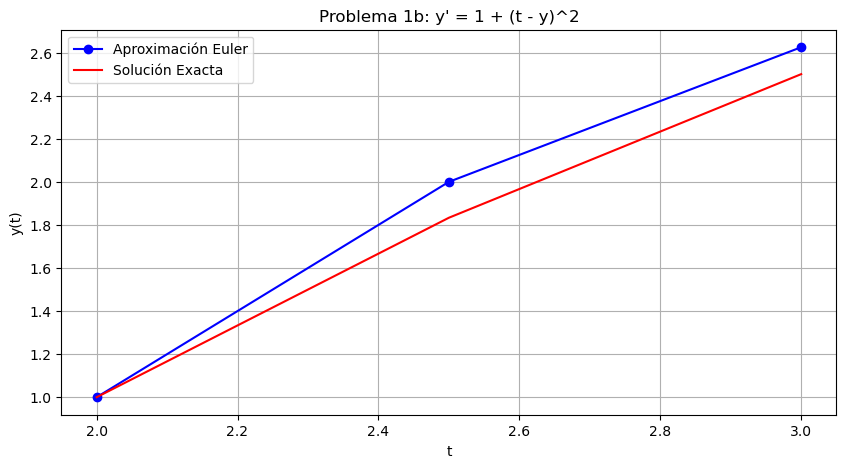

In [61]:
# 1.b)
# Parámetros
t0, y0 = 2, 1
h = 0.5
n = int((3-2)/h)

# Solución
t, y = euler_method(f1b, t0, y0, h, n)
errors, y_exact = calculate_errors(t, y, sol1b)

# Resultados
print("Problema 1b:")
print_results(t, y, y_exact, errors)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(t, y, 'bo-', label='Aproximación Euler')
plt.plot(t, y_exact, 'r-', label='Solución Exacta')
plt.title("Problema 1b: y' = 1 + (t - y)^2")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

Problema 1c:
t          Aproximado      Exacto          Error          
1.000      2.000000        2.000000        0.000000       
1.250      2.750000        2.778929        0.028929       
1.500      3.550000        3.608198        0.058198       
1.750      4.391667        4.479328        0.087661       
2.000      5.269048        5.386294        0.117247       

Error máximo: 0.117247


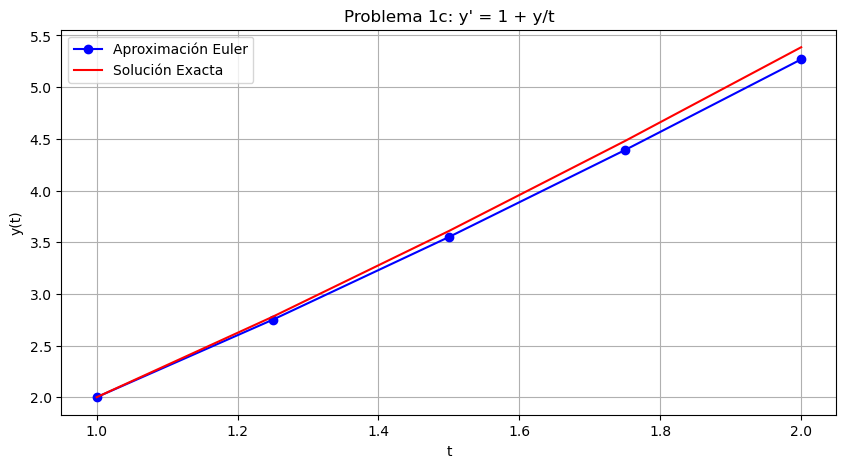

In [62]:
# 1.c)
# Parámetros
t0, y0 = 1, 2
h = 0.25
n = int((2-1)/h)

# Solución
t, y = euler_method(f1c, t0, y0, h, n)
errors, y_exact = calculate_errors(t, y, sol1c)

# Resultados
print("Problema 1c:")
print_results(t, y, y_exact, errors)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(t, y, 'bo-', label='Aproximación Euler')
plt.plot(t, y_exact, 'r-', label='Solución Exacta')
plt.title("Problema 1c: y' = 1 + y/t")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

Problema 1d:
t          Aproximado      Exacto          Error          
0.000      1.000000        1.000000        0.000000       
0.250      1.250000        1.329150        0.079150       
0.500      1.639805        1.730490        0.090684       
0.750      2.024255        2.041472        0.017217       
1.000      2.236457        2.117980        0.118478       

Error máximo: 0.118478


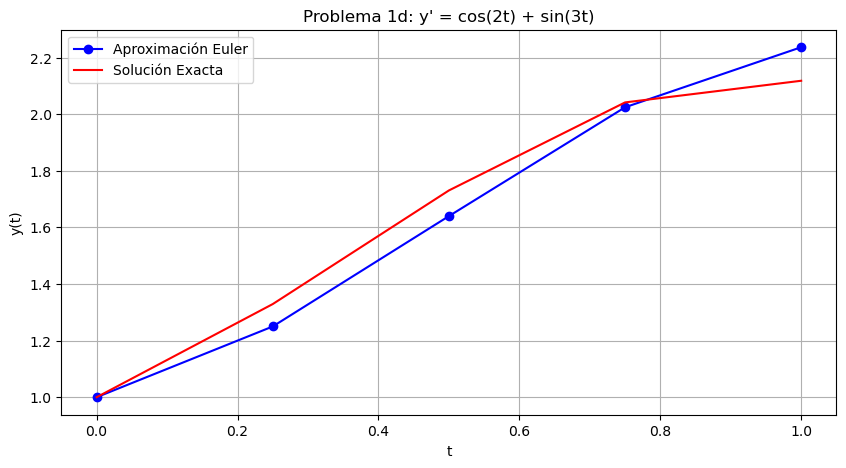

In [63]:
# 1.d)
# Parámetros
t0, y0 = 0, 1
h = 0.25
n = int(1/h)

# Solución
t, y = euler_method(f1d, t0, y0, h, n)
errors, y_exact = calculate_errors(t, y, sol1d)

# Resultados
print("Problema 1d:")
print_results(t, y, y_exact, errors)

# Gráfico
plt.figure(figsize=(10, 5))
plt.plot(t, y, 'bo-', label='Aproximación Euler')
plt.plot(t, y_exact, 'r-', label='Solución Exacta')
plt.title("Problema 1d: y' = cos(2t) + sin(3t)")
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()